In [1]:
import sys

# Install the libraries into the *same* Python your notebook is using
!{sys.executable} -m pip install pandas numpy matplotlib seaborn networkx


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import data from pkl file
data = pd.read_pickle('../data/connectivity_compliance_matrices.pkl')
display(data.head())
print(f"Data shape: {data.shape}")

,ρ,connectivity_matrix,compliance_matrix,E1,E2,E3,G23,G13,G12,nu12,nu13,nu23,nu21,nu31,nu32,BV,GV,BR,GR,AU
0,0.3,"[[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[[16.2442166588418, -4.390589663678543, -4.392...",0.061560,0.061524,0.061500,0.025668,0.025591,0.025632,0.270286,0.270381,0.270225,0.270126,0.270115,0.270120,0.044626,0.025066,0.044626,0.025047,0.003852
1,0.3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[22.194443522542244, -7.184492662134119, -7.1...",0.045056,0.045102,0.045165,0.026453,0.026486,0.026497,0.323707,0.322935,0.322292,0.324034,0.323716,0.322746,0.042532,0.022705,0.042532,0.021679,0.236657
2,0.3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[21.44865815819801, -6.467827160497426, -6.44...",0.046623,0.046639,0.046645,0.024257,0.024269,0.024219,0.301549,0.300551,0.301270,0.301656,0.300691,0.301303,0.039092,0.021717,0.039092,0.021247,0.110572
3,0.3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[15.247634909853652, -3.931170890685161, -3.9...",0.065584,0.065573,0.065544,0.027258,0.027189,0.027245,0.257822,0.257770,0.256933,0.257779,0.257614,0.256820,0.045055,0.026767,0.045055,0.026755,0.002277
4,0.3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[23.16273271145176, -5.511611078765939, -5.66...",0.043173,0.043181,0.043323,0.019940,0.019963,0.019987,0.237952,0.244505,0.239779,0.237998,0.245358,0.240568,0.027819,0.018944,0.027818,0.018860,0.022473


Data shape: (2624, 20)


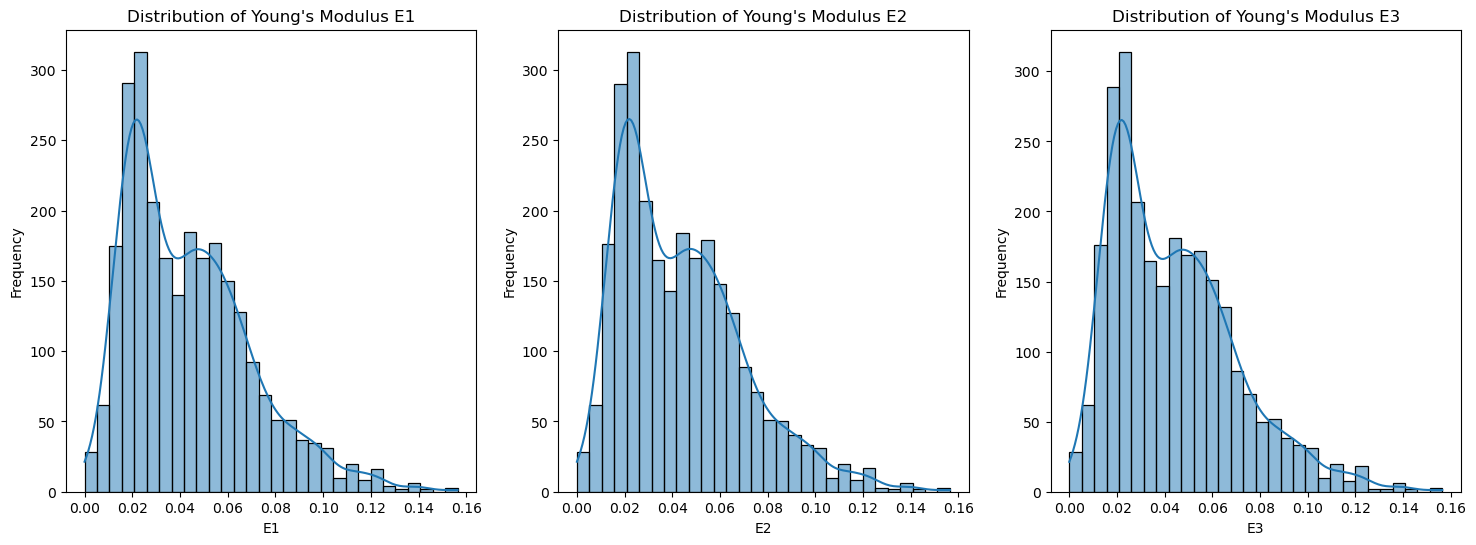

In [4]:
# Visualize the distribution of Young's modulus in all three directions (E1, E2, E3)
plt.figure(figsize=(18, 6))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[f'E{i+1}'], bins=30, kde=True)
    plt.title(f"Distribution of Young's Modulus E{i+1}")
    plt.xlabel(f"E{i+1}")
    plt.ylabel("Frequency")

plt.show()

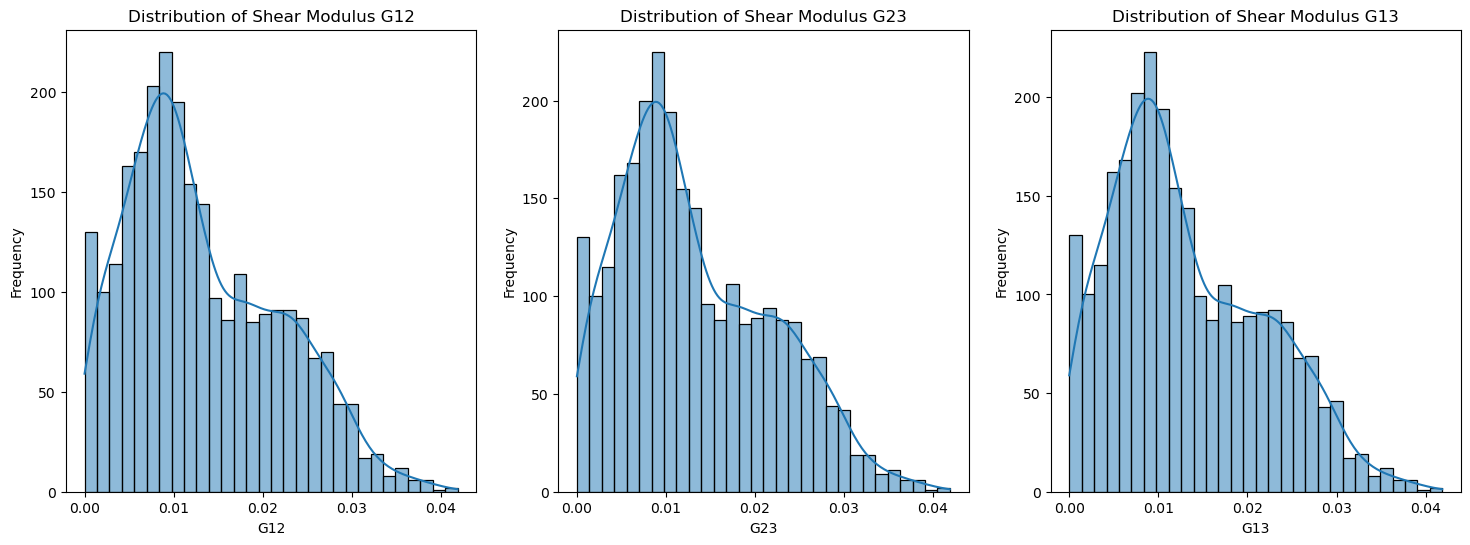

In [5]:
# Visualize the distribution of shear moduli (G12, G23, G13)
plt.figure(figsize=(18, 6))
shear_moduli_cols = ['G12', 'G23', 'G13']

for i in range(len(shear_moduli_cols)):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[shear_moduli_cols[i]], bins=30, kde=True)
    plt.title(f"Distribution of Shear Modulus {shear_moduli_cols[i]}")
    plt.xlabel(f"{shear_moduli_cols[i]}")
    plt.ylabel("Frequency")

plt.show()

There does not seem to be much variation between the Young's/Shear Moduli across the entire dataset, presumably due to the each sample having similar properties across all three dimensions.

array([[0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

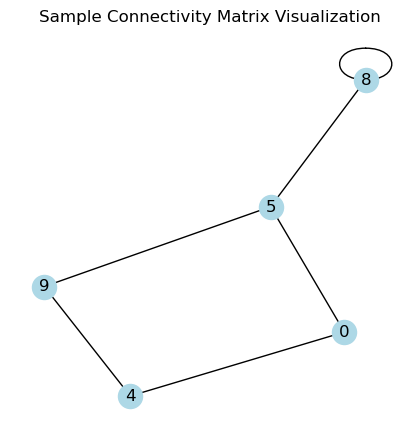

In [6]:
# Visualize one sample connectivity matrix
np.random.seed(0)

# Select a random sample
random_idx = np.random.randint(len(data))
display(data.iloc[random_idx]['connectivity_matrix'])

# Create a graph from the connectivity matrix and visualize
sample_matrix = data.iloc[random_idx]['connectivity_matrix']
G = nx.from_numpy_array(np.array(sample_matrix))
G.remove_nodes_from(list(nx.isolates(G)))
plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='black')
plt.title("Sample Connectivity Matrix Visualization")
plt.show()

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

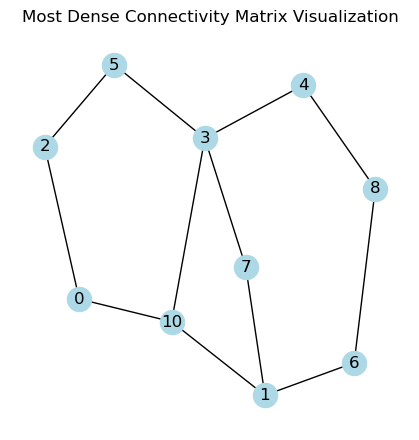

In [7]:
# Visualize the most dense connectivity matrix
max_connections_idx = data['connectivity_matrix'].apply(lambda x: np.sum(np.array(x))).idxmax()
display(data.iloc[max_connections_idx]['connectivity_matrix'])

dense_conn = data.iloc[max_connections_idx]['connectivity_matrix']
G = nx.from_numpy_array(np.array(dense_conn))
G.remove_nodes_from(list(nx.isolates(G)))
plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='black')
plt.title("Most Dense Connectivity Matrix Visualization")
plt.show()